<a href="https://colab.research.google.com/github/JENEEFATHOMAS/Birds-Species-Classification/blob/main/Birds_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/MyDrive/kaggle_dataset'

In [ ]:
%cd /content/gdrive/MyDrive/kaggle_dataset

/content/gdrive/MyDrive/kaggle_dataset


In [ ]:
!ls

100-bird-species  kaggle.json


In [ ]:
!kaggle datasets download -d gpiosenka/100-bird-species

100% 886M/889M [00:25<00:00, 57.9MB/s]
100% 889M/889M [00:25<00:00, 36.9MB/s]


In [ ]:
!mkdir 100-bird-species
!mv 100-bird-species.zip 100-bird-species 

In [ ]:
%cd 100-bird-species/

/content/gdrive/My Drive/kaggle_dataset/100-bird-species


**UNZIP DATASET**

In [ ]:
!unzip 100-bird-species.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/TOWNSENDS WARBLER/091.jpg  
  inflating: train/TOWNSENDS WARBLER/092.jpg  
  inflating: train/TOWNSENDS WARBLER/093.jpg  
  inflating: train/TOWNSENDS WARBLER/094.jpg  
  inflating: train/TOWNSENDS WARBLER/095.jpg  
  inflating: train/TOWNSENDS WARBLER/096.jpg  
  inflating: train/TOWNSENDS WARBLER/097.jpg  
  inflating: train/TOWNSENDS WARBLER/098.jpg  
  inflating: train/TOWNSENDS WARBLER/099.jpg  
  inflating: train/TOWNSENDS WARBLER/100.jpg  
  inflating: train/TOWNSENDS WARBLER/101.jpg  
  inflating: train/TOWNSENDS WARBLER/102.jpg  
  inflating: train/TOWNSENDS WARBLER/103.jpg  
  inflating: train/TOWNSENDS WARBLER/104.jpg  
  inflating: train/TOWNSENDS WARBLER/105.jpg  
  inflating: train/TOWNSENDS WARBLER/106.jpg  
  inflating: train/TOWNSENDS WARBLER/107.jpg  
  inflating: train/TOWNSENDS WARBLER/108.jpg  
  inflating: train/TOWNSENDS WARBLER/109.jpg  
  inflating: train/TOWNSENDS WARBLER/110.jpg  
  inflati

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from IPython.display import Image, display
import random
import math

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model 
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation,Concatenate
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras import backend, models
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications import VGG16, MobileNet
from keras.applications.vgg16 import preprocess_input

In [ ]:
train_dir='/content/gdrive/MyDrive/kaggle_dataset/100-bird-species/train'
test_dir='/content/gdrive/MyDrive/kaggle_dataset/100-bird-species/test'

In [ ]:
Category = os.listdir(train_dir)
print(str(len(Category)),'THE CATEGORIES ARE \n\n ', Category)
Category_count = len(Category)

275 THE CATEGORIES ARE 

  ['AFRICAN CROWNED CRANE', 'AFRICAN FIREFINCH', 'ALBATROSS', 'ALEXANDRINE PARAKEET', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'ANHINGA', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ARARIPE MANAKIN', 'ASIAN CRESTED IBIS', 'BALD EAGLE', 'BALI STARLING', 'BALTIMORE ORIOLE', 'BANANAQUIT', 'BANDED BROADBILL', 'BAR-TAILED GODWIT', 'BARN OWL', 'BARN SWALLOW', 'BARRED PUFFBIRD', 'BAY-BREASTED WARBLER', 'BEARDED BARBET', 'BEARDED REEDLING', 'BELTED KINGFISHER', 'BIRD OF PARADISE', 'BLACK & YELLOW bROADBILL', 'BLACK FRANCOLIN', 'BLACK SKIMMER', 'BLACK SWAN', 'BLACK TAIL CRAKE', 'BLACK THROATED BUSHTIT', 'BLACK THROATED WARBLER', 'BLACK VULTURE', 'BLACK-CAPPED CHICKADEE', 'BLACK-NECKED GREBE', 'BLACK-THROATED SPARROW', 'BLACKBURNIAM WARBLER', 'BLUE GROUSE', 'BLUE HERON', 'BOBOLINK', 'BORNEAN BRISTLEHEAD', 'BORNEAN LEAFBIRD', 'BROWN NOODY', 'BROWN THRASHER', 'BULWERS PHEASANT', 'CACTUS WR

In [ ]:
train_data = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_data = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [ ]:
train_dataset =train_data.flow_from_directory(
    directory=train_dir, 
    target_size=(224,224),
    subset='training'
    )
print('Train data groups:', len(train_dataset)) 
Train_groups = len(train_dataset)

validation_dataset = train_data.flow_from_directory(
    directory=train_dir, 
    target_size=(224,224),
    subset='validation'
    )
image_qty = len(validation_dataset.filenames)
print('Validation data groups:', len(validation_dataset))
print('validation image qty:',str(image_qty))
Valid_groups = len(validation_dataset)

test_dataset = test_data.flow_from_directory(
    directory=test_dir, 
    target_size=(224,224),
    )
print('Test data groups:', len(test_dataset))

Found 31598 images belonging to 275 classes.
Train data groups: 988
Found 7766 images belonging to 275 classes.
Validation data groups: 243
validation image qty: 7766
Found 1375 images belonging to 275 classes.
Test data groups: 43


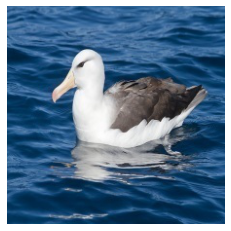

Figures shapes are  (224, 224, 3)


In [ ]:
IMAGE = load_img("/content/gdrive/MyDrive/kaggle_dataset/100-bird-species/train/ALBATROSS/002.jpg")
plt.imshow(IMAGE)
plt.axis("off")
plt.show()

IMAGEDATA = img_to_array(IMAGE)
SHAPE = IMAGEDATA.shape
print('Figures shapes are ', SHAPE)

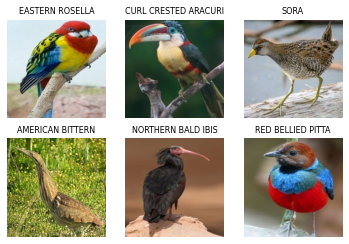

In [ ]:
def label_images2(DIR, dataset):
    label = []
    image = []
    j=0
    for i in range (0,30):
        j = random.randint(0, len(dataset.filenames))
        label.append(dataset.filenames[j].split('/')[0])
        image.append(DIR + '/' + dataset.filenames[j])
    return [label,image]

#plot the random images.
y,x = label_images2(test_dir, test_dataset)

for i in range(0,6):
    X = load_img(x[i])
    plt.subplot(2,3,+1 + i)
    plt.axis(False)
    plt.title(y[i], fontsize=8)
    plt.imshow(X)
plt.show()

In [ ]:
backend.clear_session()

base_mobilenet = MobileNet(weights = 'imagenet', include_top = False, 
                           input_shape = SHAPE)
base_mobilenet.trainable = False                      # mobilenet weights.

model = Sequential()
model.add(base_mobilenet)

model.add(Flatten()) 
model.add(Activation('relu'))
model.add(Dense(Category_count)) 
model.add(Activation('softmax'))

model.summary()

17227776/17225924 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
activation (Activation)      (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 275)               13798675  
_________________________________________________________________
activation_1 (Activation)    (None, 275)               0         
Total params: 17,027,539
Trainable params: 13,798,675
Non-trainable params: 3,228,864
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.SGD(
        learning_rate=0.001, 
        momentum=0.9, 
        nesterov=True),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
    )

history = model.fit( 
    train_dataset, 
    steps_per_epoch = Train_groups, 
    epochs = 50,
    validation_data = validation_dataset,
    validation_steps = Valid_groups,
    verbose = 1,
    callbacks=[EarlyStopping(
        monitor = 'val_accuracy', 
        patience = 5, 
        restore_best_weights = True),
        ReduceLROnPlateau(
            monitor = 'val_loss', 
            factor = 0.7,                         #0.2 to 0.5 dropped to fast 0.7
            patience = 2,
            verbose = 1)
        ])

Epoch 1/50
 53/988 [>.............................] - ETA: 5:19:21 - loss: 7.6428 - accuracy: 0.1551

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


s = model.evaluate(test_data, verbose=1)
print('Test accuracy:', s[1])

In [ ]:
predictions = np.argmax(model.predict(test_images), axis=1)

acc = accuracy_score(test_images.labels, predictions)
cm = tf.math.confusion_matrix(test_images.labels, predictions)
clr = classification_report(test_images.labels, predictions, target_names=CLASS_NAMES)

print("Test Accuracy: {:.3f}%".format(acc * 100))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.yticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(" Test Classification Report:\n----------------------\n", clr)